# Final Plots (using Python)

In [41]:
import numpy as np
import torch
import pandas as pd
from os.path import join as oj

from kipoi_veff.utils.plot import seqlogo_heatmap
import matplotlib.pyplot as plt

In [42]:
def swap_positions(pwms):
    # swap from agct to acgt format
    return pwms[:, np.array([0, 2, 1, 3]), :]

### Comparing direct, max activation, and all activation methods

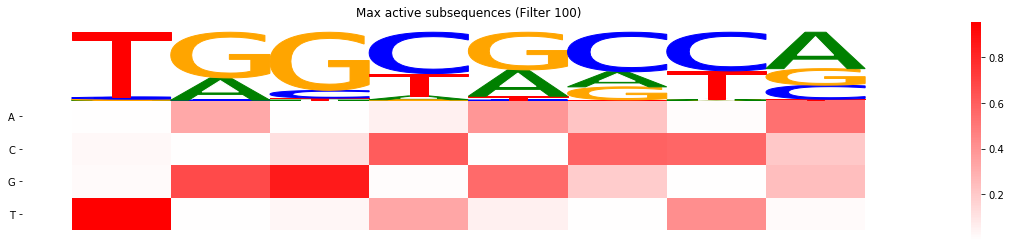

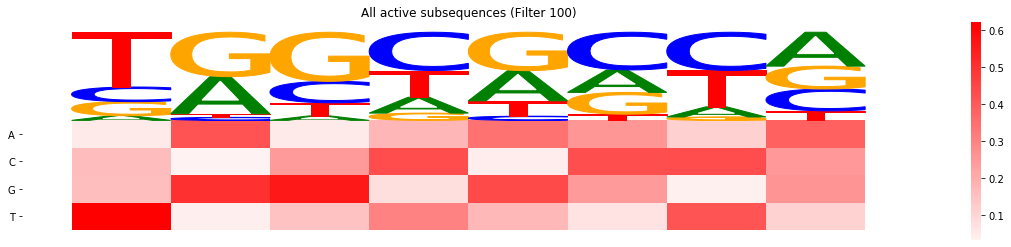

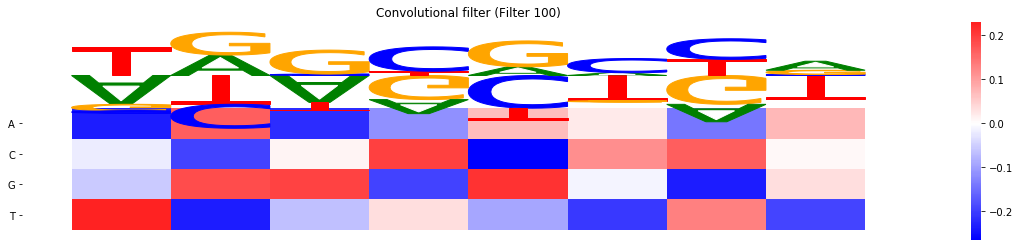

In [46]:
# out directory
out_dir = "out"

# load in pwms
pwms1 = swap_positions(np.load(oj(out_dir, "PWMs_max_active_per_seq.npy")))
pwms2 = swap_positions(np.load(oj(out_dir, "PWMs_all_active_per_seq.npy")))
pwms3 = np.load(oj(out_dir, "PWMs_direct.npy"))

# filters to look at
f1 = 100
f2 = 100
f3 = 100
pwm1 = pwms1[f1-1, :]  # index start at 1
pwm2 = pwms2[f2-1, :]
pwm3 = pwms3[f3-1, :]
# for i in range(pwm3.shape[1]):  # normalize direct pwm to be between 0 and 1 and colsum to 1
#     pwm3[:, i] = (pwm3[:, i] - pwm3[:, i].min()) / (pwm3[:, i] - pwm3[:, i].min()).sum()
    
# visualize
seqlogo_heatmap(pwm1.T, pwm1)
plt.title("Max active subsequences (Filter " + str(f1) + ")")
plt.show()
seqlogo_heatmap(pwm2.T, pwm2)
plt.title("All active subsequences (Filter " + str(f2) + ")")
plt.show()
seqlogo_heatmap(pwm3.T, pwm3)
plt.title("Convolutional filter (Filter " + str(f3) + ")")
plt.show()

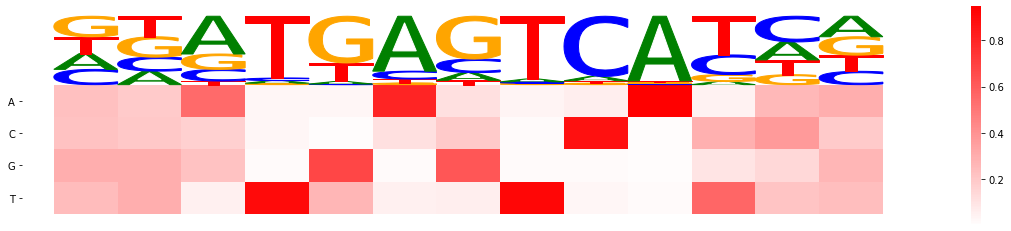

In [55]:
import re
jaspar_dir = 'data/JASPAR-2020/'
# get jaspar PWM function
def getJasparPwm(index):
    jaspar_list = []
    with open(jaspar_dir + jaspar_id[index] + '.meme', "r") as f:
        for line in f:
            if re.match('^ [0-9].*', line):
                jaspar_list.append(line.replace('\n', ''))

    jaspar = np.zeros((len(jaspar_list), 4))
    for i in range(len(jaspar_list)):
        for j in range(4):
            jaspar[i, j] = float(jaspar_list[i].split()[j])
    return jaspar
def pwmRevComp(pwm):
    return np.fliplr(np.flipud(pwm))

tomtom_dir = "tomtom/results/"
tomtom = pd.read_csv(tomtom_dir + "PWMs_max_active_per_seq.tsv", sep='\t')

# sort the tomtom data by p-value and look at the top couple motifs 
pwm_id = tomtom.sort_values(by=['p-value'])['Query_ID'].to_list()
jaspar_id = tomtom.sort_values(by=['p-value'])['Target_ID'].to_list()
offset = tomtom.sort_values(by=['p-value'])['Optimal_offset'].to_list()
orientation = tomtom.sort_values(by=['p-value'])['Orientation'].to_list()
tomtom.sort_values(by=['p-value']).head()

index = 0
jaspar = getJasparPwm(index)
if orientation[index] == '-':
    jaspar = pwmRevComp(jaspar)
np.save("out/junb_jaspar_motif.npy", jaspar.T)
seqlogo_heatmap(jaspar, jaspar.T)
plt.show()